In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

In [2]:
df = pd.read_csv ('Data/train.csv')

In [5]:
df

,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Ram_encoded
0,268,1002,Dell,Inspiron 5567,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36kg,749.00,3.0
1,347,867,Asus,X541NA (N4200/4GB/1TB/W10),Notebook,15.6,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4,1TB HDD,Intel HD Graphics 505,Windows 10,2kg,449.00,1.0
2,353,966,Toshiba,Portege Z30-C-1CW,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.2kg,1460.00,3.0
3,578,767,Dell,Alienware 17,Gaming,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42kg,2868.99,5.0
4,42,1241,Dell,Latitude E7270,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.26kg,1713.37,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,89,973,Acer,Chromebook C738T-C2EJ,2 in 1 Convertible,11.6,IPS Panel Touchscreen 1366x768,Intel Celeron Dual Core N3060 1.6GHz,4,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.25kg,389.00,1.0
908,716,1018,Toshiba,Portege Z30-C-16H,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.2kg,1195.00,1.0
909,517,1071,Acer,Aspire ES1-523,Notebook,15.6,1366x768,AMD A8-Series 7410 2.2GHz,8,1TB HDD,AMD Radeon R5,Windows 10,2.4kg,449.00,3.0
910,891,965,Dell,Latitude 7480,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 7600U 2.8GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.36kg,1775.00,3.0


Mean Squared Error: 195577.52690324464
R² Score: 0.5471758194212015


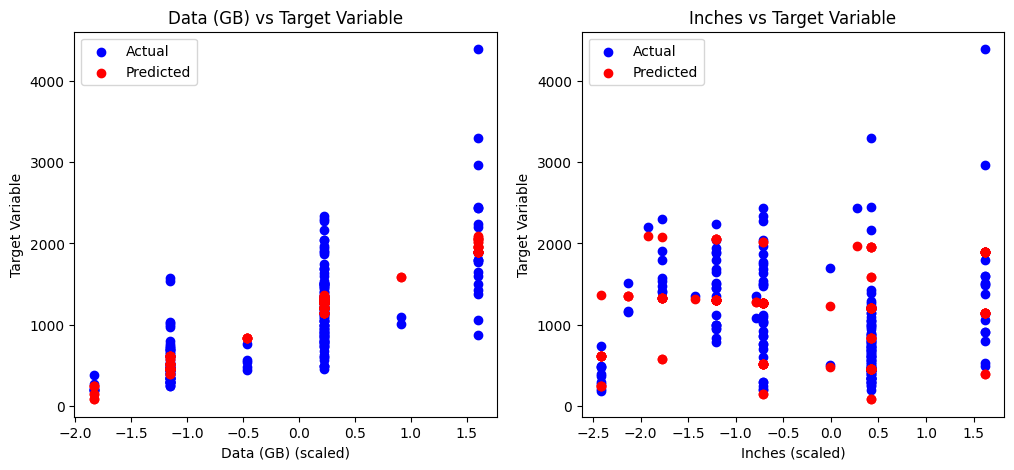

In [7]:
df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)

# Crear el OrdinalEncoder
encoder = OrdinalEncoder(categories=[sorted(df['Ram'].unique())])

# Aplicar el encoder a la columna 'Ram'
df['Ram_encoded'] = encoder.fit_transform(df[['Ram']])

# Preparar los datos (asegúrate de que 'data_gb', 'Inches' y 'y' sean las columnas correctas)
X = df[['Ram_encoded', 'Inches']]  # Las variables independientes
y = df['Price_euros']                    # La variable dependiente

# Escalar las variables independientes
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal múltiple
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Visualizar los resultados
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_test[:, 0], y_test, color='blue', label='Actual')
plt.scatter(X_test[:, 0], y_pred, color='red', label='Predicted')
plt.xlabel('Data (GB) (scaled)')
plt.ylabel('Target Variable')
plt.title('Data (GB) vs Target Variable')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 1], y_test, color='blue', label='Actual')
plt.scatter(X_test[:, 1], y_pred, color='red', label='Predicted')
plt.xlabel('Inches (scaled)')
plt.ylabel('Target Variable')
plt.title('Inches vs Target Variable')
plt.legend()

plt.show()


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

# Cargar los datos
df = pd.read_csv ('Data/train.csv')

df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)

# Crear el OrdinalEncoder
encoder = OrdinalEncoder(categories=[sorted(df['Ram'].unique())])

# Aplicar el encoder a la columna 'Ram'
df['Ram_encoded'] = encoder.fit_transform(df[['Ram']])

# Preparar los datos (asegúrate de que 'data_gb', 'Inches' y 'y' sean las columnas correctas)
X = df[['Ram_encoded', 'Inches']]  # Las variables independientes
y = df['Price_euros']      



# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Crear un pipeline para probar varios modelos
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Parámetros para Grid Search
param_grid = [
    {
        'regressor': [LinearRegression()]
    },
    {
        'regressor': [Ridge()],
        'regressor__alpha': [0.1, 1.0, 10.0]
    },
    {
        'regressor': [Lasso()],
        'regressor__alpha': [0.1, 1.0, 10.0]
    },
    {
        'regressor': [RandomForestRegressor()],
        'regressor__n_estimators': [50, 100, 200],
        'regressor__max_depth': [None, 10, 20]
    }
]

# Grid Search con validación cruzada
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mejor modelo
best_model = grid_search.best_estimator_

# Predicciones
y_pred = best_model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Best Model: {best_model}")


Mean Squared Error: 170195.18030426436
Best Model: Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor',
                 RandomForestRegressor(max_depth=20, n_estimators=50))])


In [9]:
import pandas as pd

# Cargar los datos
df = pd.read_csv ('Data/train.csv')

# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Mostrar la matriz de correlación
print(correlation_matrix)

# Correlación con la variable objetivo 'y'



ValueError: could not convert string to float: 'Dell'

In [ ]:
correlation_with_target = correlation_matrix['y']
print(correlation_with_target)

In [ ]:
# Seleccionar características con alta correlación
high_corr_features = correlation_with_target[abs(correlation_with_target) > 0.1].index
X_selected = df[high_corr_features].drop(columns='y')


In [ ]:
#Reducción de Dimensionalidad: PCA (Análisis de Componentes Principales)
from sklearn.preprocessing import StandardScaler

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

from sklearn.decomposition import PCA

# Aplicar PCA
pca = PCA(n_components=0.95)  # Retener el 95% de la varianza
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_
print(f"Varianza explicada por cada componente: {explained_variance}")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_pca, df['y'], test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")



In [10]:
df = pd.read_csv ('Data/train.csv')
df

,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,268,1002,Dell,Inspiron 5567,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36kg,749.00
1,347,867,Asus,X541NA (N4200/4GB/1TB/W10),Notebook,15.6,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4GB,1TB HDD,Intel HD Graphics 505,Windows 10,2kg,449.00
2,353,966,Toshiba,Portege Z30-C-1CW,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.2kg,1460.00
3,578,767,Dell,Alienware 17,Gaming,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42kg,2868.99
4,42,1241,Dell,Latitude E7270,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.26kg,1713.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,89,973,Acer,Chromebook C738T-C2EJ,2 in 1 Convertible,11.6,IPS Panel Touchscreen 1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.25kg,389.00
908,716,1018,Toshiba,Portege Z30-C-16H,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.2kg,1195.00
909,517,1071,Acer,Aspire ES1-523,Notebook,15.6,1366x768,AMD A8-Series 7410 2.2GHz,8GB,1TB HDD,AMD Radeon R5,Windows 10,2.4kg,449.00
910,891,965,Dell,Latitude 7480,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 7600U 2.8GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.36kg,1775.00


In [22]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Leer los datos
df = pd.read_csv('Data/train.csv')

# Codificar la variable categórica 'Gpu' con OneHotEncoding
onehot_encoder = OneHotEncoder(sparse_output=False)
gpu_onehot = onehot_encoder.fit_transform(df[['Gpu']])

# Convertir el resultado de OneHotEncoding en un DataFrame y unirlo con el DataFrame original
gpu_df = pd.DataFrame(gpu_onehot, columns=onehot_encoder.get_feature_names_out(['Gpu']))
df = pd.concat([df, gpu_df], axis=1).drop(columns=['Gpu'])

# Procesar la columna 'Ram'
df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)

# Crear el OrdinalEncoder para 'Ram'
encoder = OrdinalEncoder(categories=[sorted(df['Ram'].unique())])

# Aplicar el encoder a la columna 'Ram'
df['Ram_encoded'] = encoder.fit_transform(df[['Ram']])

# Preparar los datos para la regresión lineal múltiple
X = df[['Ram_encoded', 'Inches']]  # Las variables independientes
y = df['Price_euros']                    # La variable dependiente

# Escalar las variables independientes
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal múltiple
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")



Mean Squared Error: 195577.52690324464
R² Score: 0.5471758194212015


In [23]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Leer los datos
df = pd.read_csv('Data/train.csv')

# Codificar la variable categórica 'Gpu' con OneHotEncoding
onehot_encoder_gpu = OneHotEncoder(sparse_output=False)
gpu_onehot = onehot_encoder_gpu.fit_transform(df[['Gpu']])

# Convertir el resultado de OneHotEncoding en un DataFrame y unirlo con el DataFrame original
gpu_df = pd.DataFrame(gpu_onehot, columns=onehot_encoder_gpu.get_feature_names_out(['Gpu']))
df = pd.concat([df, gpu_df], axis=1)

# Procesar la columna 'Ram'
df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)

# Crear el OrdinalEncoder para 'Ram'
encoder_ram = OrdinalEncoder(categories=[sorted(df['Ram'].unique())])

# Aplicar el encoder a la columna 'Ram'
df['Ram_encoded'] = encoder_ram.fit_transform(df[['Ram']])

# Preparar los datos para la regresión lineal múltiple
X = df[['Ram_encoded', 'Inches'] + list(gpu_df.columns)]  # Las variables independientes (Ram, Inches, y las GPUs)
y = df['Price_euros']                                     # La variable dependiente

# Escalar las variables independientes
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal múltiple
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 5.077449759101527e+33
R² Score: -1.1755911136623658e+28


In [24]:
df

,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,...,Gpu_Nvidia Quadro M1200,Gpu_Nvidia Quadro M2000M,Gpu_Nvidia Quadro M2200,Gpu_Nvidia Quadro M2200M,Gpu_Nvidia Quadro M3000M,Gpu_Nvidia Quadro M500M,Gpu_Nvidia Quadro M520M,Gpu_Nvidia Quadro M620,Gpu_Nvidia Quadro M620M,Ram_encoded
0,268,1002,Dell,Inspiron 5567,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8,1TB HDD,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1,347,867,Asus,X541NA (N4200/4GB/1TB/W10),Notebook,15.6,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4,1TB HDD,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,353,966,Toshiba,Portege Z30-C-1CW,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
3,578,767,Dell,Alienware 17,Gaming,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
4,42,1241,Dell,Latitude E7270,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8,256GB SSD,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,89,973,Acer,Chromebook C738T-C2EJ,2 in 1 Convertible,11.6,IPS Panel Touchscreen 1366x768,Intel Celeron Dual Core N3060 1.6GHz,4,32GB Flash Storage,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
908,716,1018,Toshiba,Portege Z30-C-16H,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4,128GB SSD,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
909,517,1071,Acer,Aspire ES1-523,Notebook,15.6,1366x768,AMD A8-Series 7410 2.2GHz,8,1TB HDD,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
910,891,965,Dell,Latitude 7480,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 7600U 2.8GHz,8,256GB SSD,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [34]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Leer los datos
df = pd.read_csv('Data/train.csv')

# Seleccionar solo las columnas de interés
df_subset = df[['Ram', 'Inches', 'Gpu']]

# Procesar la columna 'Ram'
df_subset['Ram'] = df_subset['Ram'].str.replace('GB', '').astype(int)

# Codificar la variable categórica 'Gpu' con OneHotEncoding
onehot_encoder_gpu = OneHotEncoder(sparse_output=False)
gpu_onehot = onehot_encoder_gpu.fit_transform(df_subset[['Gpu']])

# Convertir el resultado de OneHotEncoding en un DataFrame y unirlo con el DataFrame original
gpu_df = pd.DataFrame(gpu_onehot, columns=onehot_encoder_gpu.get_feature_names_out(['Gpu']))
df_subset = pd.concat([df_subset, gpu_df], axis=1).drop(columns=['Gpu'])

# Escalar las variables 'Ram' e 'Inches'
scaler = StandardScaler()
df_subset[['Ram', 'Inches']] = scaler.fit_transform(df_subset[['Ram', 'Inches']])

# Preparar los datos para la regresión lineal múltiple


C:\Users\pobla\AppData\Local\Temp\ipykernel_23728\160818288.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['Ram'] = df_subset['Ram'].str.replace('GB', '').astype(int)


In [36]:
df_subset

,Ram,Inches,Gpu_AMD FirePro W4190M,Gpu_AMD FirePro W6150M,Gpu_AMD R17M-M1-70,Gpu_AMD R4 Graphics,Gpu_AMD Radeon 520,Gpu_AMD Radeon 530,Gpu_AMD Radeon Pro 455,Gpu_AMD Radeon Pro 555,...,Gpu_Nvidia Quadro M1000M,Gpu_Nvidia Quadro M1200,Gpu_Nvidia Quadro M2000M,Gpu_Nvidia Quadro M2200,Gpu_Nvidia Quadro M2200M,Gpu_Nvidia Quadro M3000M,Gpu_Nvidia Quadro M500M,Gpu_Nvidia Quadro M520M,Gpu_Nvidia Quadro M620,Gpu_Nvidia Quadro M620M
0,-0.038512,0.417157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.855315,0.417157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.038512,-1.212927,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.595095,0.417157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.038512,-1.779913,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,-0.855315,-2.417773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
908,-0.855315,-1.212927,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
909,-0.038512,0.417157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
910,-0.038512,-0.716815,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
X = df_subset  # Las variables independientes (Ram, Inches, y las GPUs)
y = df['Price_euros']                        # La variable dependiente

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal múltiple
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 1.5422240203286706e+30
R² Score: -3.570739130062518e+24


In [120]:
df_1 = pd.read_csv('Data/train.csv')

In [121]:
df = df_1.copy ()

df [['Modelo_CPU', 'Velocidad_CPU']] = df['Cpu'].str.extract(r'(.+)\s+(\d+\.\d+GHz)')

df['Velocidad_CPU'] = df['Velocidad_CPU'].str.extract(r'(\d+\.\d+)').astype(float)

# Eliminar la columna original "Cpu"
df.drop(columns=['Cpu'], inplace=True)

# Imprimir las primeras filas para verificar


# Imprimir las primeras filas para verificar
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                912 non-null    int64  
 1   laptop_ID         912 non-null    int64  
 2   Company           912 non-null    object 
 3   Product           912 non-null    object 
 4   TypeName          912 non-null    object 
 5   Inches            912 non-null    float64
 6   ScreenResolution  912 non-null    object 
 7   Ram               912 non-null    object 
 8   Memory            912 non-null    object 
 9   Gpu               912 non-null    object 
 10  OpSys             912 non-null    object 
 11  Weight            912 non-null    object 
 12  Price_euros       912 non-null    float64
 13  Modelo_CPU        851 non-null    object 
 14  Velocidad_CPU     851 non-null    float64
dtypes: float64(3), int64(2), object(10)
memory usage: 107.0+ KB


In [123]:
# Filtrar el DataFrame para mostrar las filas con valores nulos en 'Velocidad_CPU'
null_rows = df[df['Velocidad_CPU'].isnull()]

id = null_rows ['id']

id

6      1136
13       44
25      829
46     1047
47      648
       ... 
708     131
772     604
865     504
884    1095
886     431
Name: id, Length: 61, dtype: int64

In [127]:

# Filtrar el DataFrame por la lista de IDs
resultados_busqueda = df_1[df_1['id'].isin(id)]

# Imprimir los resultados de la búsqueda
cpu_nuevo = resultados_busqueda ['Cpu']

cpu_nuevo

KeyError: 'Cpu'

In [68]:
df ['Modelo_CPU'].value_counts ()

Modelo_CPU
Intel Core i5 7200U     145
Intel Core i7 7700HQ    102
Intel Core i7 7500U      89
Intel Core i5 8250U      54
Intel Core i5 6200U      51
                       ... 
AMD E-Series 6110         1
AMD E-Series E2-6110      1
AMD Ryzen 1600            1
Intel Core i5 7500U       1
AMD E-Series 9000         1
Name: count, Length: 79, dtype: int64

In [69]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Leer los datos

# Seleccionar las columnas de interés
df_subset = df[['Ram', 'Inches', 'Gpu', 'Modelo_CPU', 'Velocidad_CPU']]

# Procesar la columna 'Ram'
df_subset['Ram'] = df_subset['Ram'].str.replace('GB', '').astype(int)

# Codificar la variable categórica 'Gpu' con OneHotEncoding
onehot_encoder_gpu = OneHotEncoder(sparse_output=False)
gpu_onehot = onehot_encoder_gpu.fit_transform(df_subset[['Gpu']])

# Convertir el resultado de OneHotEncoding en un DataFrame y unirlo con el DataFrame original
gpu_df = pd.DataFrame(gpu_onehot, columns=onehot_encoder_gpu.get_feature_names_out(['Gpu']))
df_subset = pd.concat([df_subset, gpu_df], axis=1).drop(columns=['Gpu'])

# Codificar la variable categórica 'Modelo_CPU' con OneHotEncoding
onehot_encoder_cpu = OneHotEncoder(sparse_output=False)
cpu_onehot = onehot_encoder_cpu.fit_transform(df_subset[['Modelo_CPU']])

# Convertir el resultado de OneHotEncoding en un DataFrame y unirlo con el DataFrame original
cpu_df = pd.DataFrame(cpu_onehot, columns=onehot_encoder_cpu.get_feature_names_out(['Modelo_CPU']))
df_subset = pd.concat([df_subset, cpu_df], axis=1).drop(columns=['Modelo_CPU'])

# Escalar las variables 'Ram', 'Inches' y 'Velocidad_CPU'
scaler = StandardScaler()
df_subset[['Ram', 'Inches', 'Velocidad_CPU']] = scaler.fit_transform(df_subset[['Ram', 'Inches', 'Velocidad_CPU']])

# Preparar los datos para la regresión lineal múltiple
X = df_subset # Las variables independientes (Ram, Inches, Gpu, Modelo_CPU y Velocidad_CPU)
y = df['Price_euros']                        # La variable dependiente

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Ridge
ridge_model = Ridge(alpha=1.0)  # Puedes ajustar el valor de alpha según sea necesario
ridge_model.fit(X_train, y_train)

# Hacer predicciones
y_pred_ridge = ridge_model.predict(X_test)

# Evaluar el modelo de Ridge
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression:")
print(f"Mean Squared Error: {mse_ridge}")
print(f"R² Score: {r2_ridge}")

# Crear y entrenar el modelo de Lasso
lasso_model = Lasso(alpha=1.0)  # Puedes ajustar el valor de alpha según sea necesario
lasso_model.fit(X_train, y_train)

# Hacer predicciones
y_pred_lasso = lasso_model.predict(X_test)

# Evaluar el modelo de Lasso
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("\nLasso Regression:")
print(f"Mean Squared Error: {mse_lasso}")
print(f"R² Score: {r2_lasso}")


C:\Users\pobla\AppData\Local\Temp\ipykernel_23728\1540449196.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['Ram'] = df_subset['Ram'].str.replace('GB', '').astype(int)


ValueError: Input X contains NaN.
Ridge does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [59]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Leer los datos
#df = pd.read_csv('Data/train.csv')

# Seleccionar solo las columnas de interés
df_subset = df[['Ram', 'Inches', 'Gpu']]

# Procesar la columna 'Ram'
df_subset['Ram'] = df_subset['Ram'].str.replace('GB', '').astype(int)

# Codificar la variable categórica 'Gpu' con OneHotEncoding
onehot_encoder_gpu = OneHotEncoder(sparse_output=False)
gpu_onehot = onehot_encoder_gpu.fit_transform(df_subset[['Gpu']])

# Convertir el resultado de OneHotEncoding en un DataFrame y unirlo con el DataFrame original
gpu_df = pd.DataFrame(gpu_onehot, columns=onehot_encoder_gpu.get_feature_names_out(['Gpu']))
df_subset = pd.concat([df_subset, gpu_df], axis=1).drop(columns=['Gpu'])

# Escalar las variables 'Ram' e 'Inches'
scaler = StandardScaler()
df_subset[['Ram', 'Inches']] = scaler.fit_transform(df_subset[['Ram', 'Inches']])

# Preparar los datos para la regresión lineal múltiple
X = df_subset # Las variables independientes (Ram, Inches, y las GPUs)
y = df['Price_euros']                        # La variable dependiente

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Ridge
ridge_model = Ridge(alpha=1.0)  # Puedes ajustar el valor de alpha según sea necesario
ridge_model.fit(X_train, y_train)

# Hacer predicciones
y_pred_ridge = ridge_model.predict(X_test)

# Evaluar el modelo de Ridge
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression:")
print(f"Mean Squared Error: {mse_ridge}")
print(f"R² Score: {r2_ridge}")

# Crear y entrenar el modelo de Lasso
lasso_model = Lasso(alpha=1.0)  # Puedes ajustar el valor de alpha según sea necesario
lasso_model.fit(X_train, y_train)

# Hacer predicciones
y_pred_lasso = lasso_model.predict(X_test)

# Evaluar el modelo de Lasso
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("\nLasso Regression:")
print(f"Mean Squared Error: {mse_lasso}")
print(f"R² Score: {r2_lasso}")


Ridge Regression:
Mean Squared Error: 183911.0566106007
R² Score: 0.5741874088106456

Lasso Regression:
Mean Squared Error: 197066.91972731217
R² Score: 0.5437274013140845


C:\Users\pobla\AppData\Local\Temp\ipykernel_23728\401540134.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['Ram'] = df_subset['Ram'].str.replace('GB', '').astype(int)


In [28]:
X_scaled

array([[-0.03851156,  0.41715749, -0.04688072, ..., -0.03313148,
        -0.04688072, -0.03313148],
       [-0.85531492,  0.41715749, -0.04688072, ..., -0.03313148,
        -0.04688072, -0.03313148],
       [-0.03851156, -1.21292738, -0.04688072, ..., -0.03313148,
        -0.04688072, -0.03313148],
       ...,
       [-0.03851156,  0.41715749, -0.04688072, ..., -0.03313148,
        -0.04688072, -0.03313148],
       [-0.03851156, -0.71681459, -0.04688072, ..., -0.03313148,
        -0.04688072, -0.03313148],
       [-0.03851156,  0.41715749, -0.04688072, ..., -0.03313148,
        -0.04688072, -0.03313148]])